In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.impute import SimpleImputer
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\Users\\chsur\\Downloads\\archive (4)\\credit_risk_dataset.csv"
data = pd.read_csv(file_path)



<Figure size 1000x800 with 0 Axes>

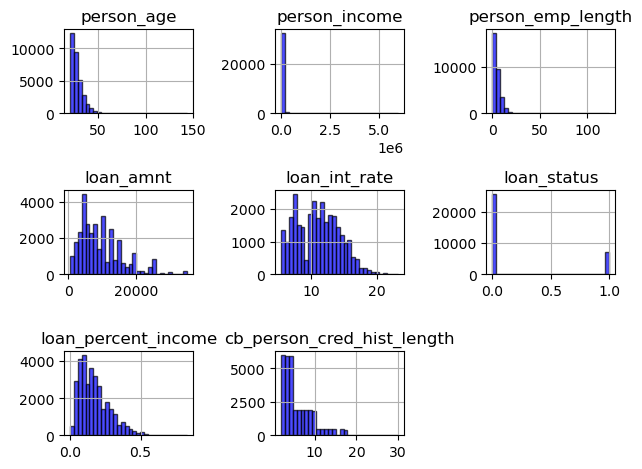

In [2]:

# Data Exploration and Visualization
# Example histograms
plt.figure(figsize=(10, 8))
data.hist(bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.tight_layout()
plt.show()


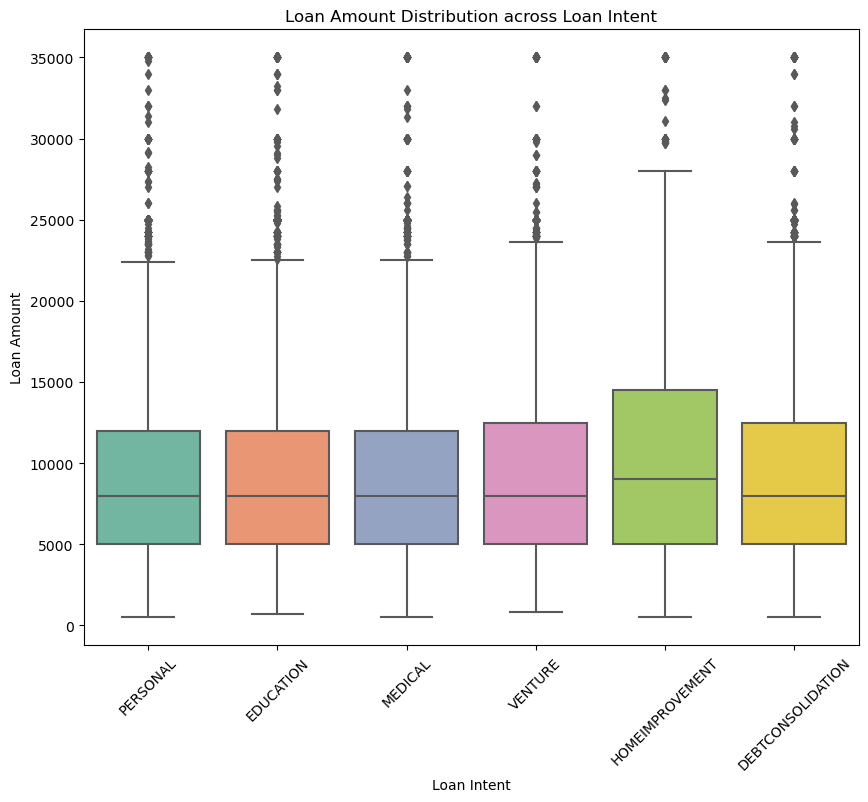

In [4]:
# Example boxplot for loan_amnt across loan_intent categories
plt.figure(figsize=(10, 8))
sns.boxplot(x='loan_intent', y='loan_amnt', data=data, palette='Set2')
plt.title('Loan Amount Distribution across Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

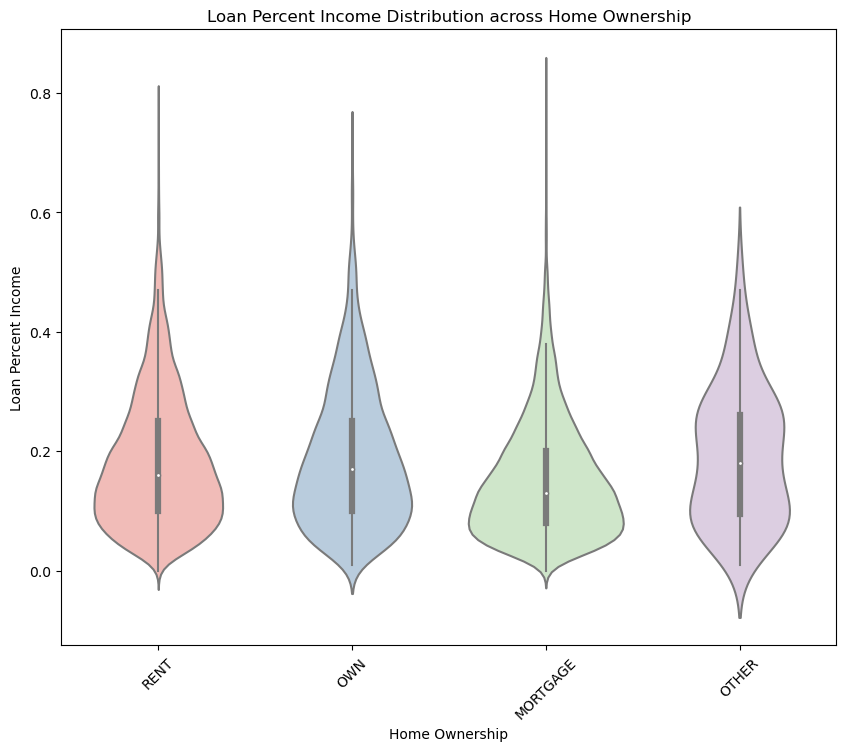

In [5]:
# Example violin plot for person_home_ownership and loan_percent_income
plt.figure(figsize=(10, 8))
sns.violinplot(x='person_home_ownership', y='loan_percent_income', data=data, palette='Pastel1')
plt.title('Loan Percent Income Distribution across Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Percent Income')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Data Preprocessing
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [7]:
# Split the data
X = data.drop('loan_status', axis=1)
y = data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

clf.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent',
                                                   'cb_person_default_on_file'])])),
                ('classifier', LogisticRegression())])

In [9]:
# Model Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Accuracy: 0.8382691422433635
Precision: 0.7150715071507151
Recall: 0.44982698961937717


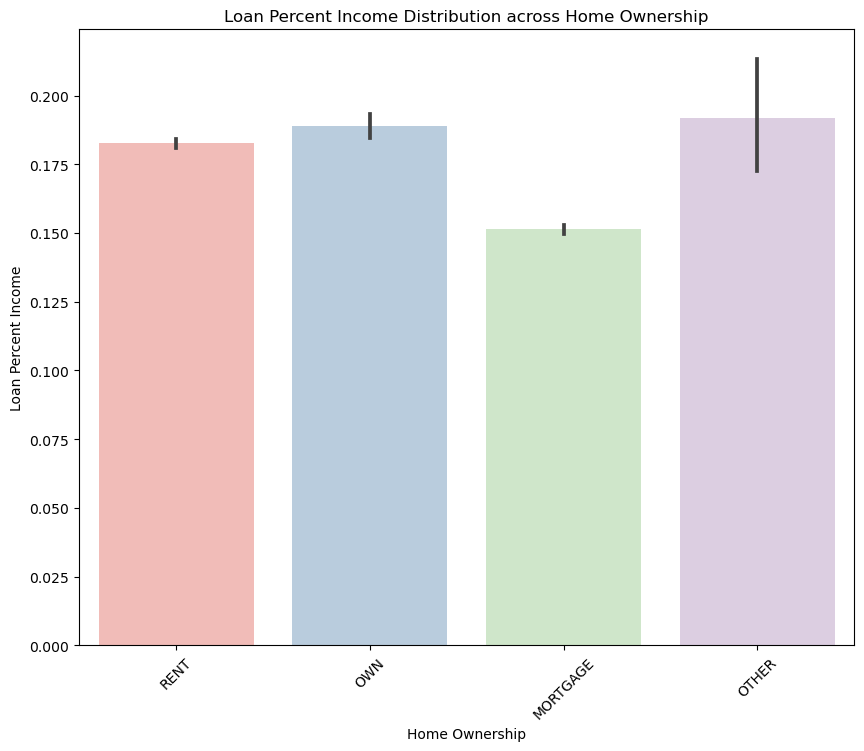

In [10]:
plt.figure(figsize=(10, 8))
sns.barplot(x='person_home_ownership', y='loan_percent_income', data=data, palette='Pastel1')
plt.title('Loan Percent Income Distribution across Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Percent Income')
plt.xticks(rotation=45)
plt.show()


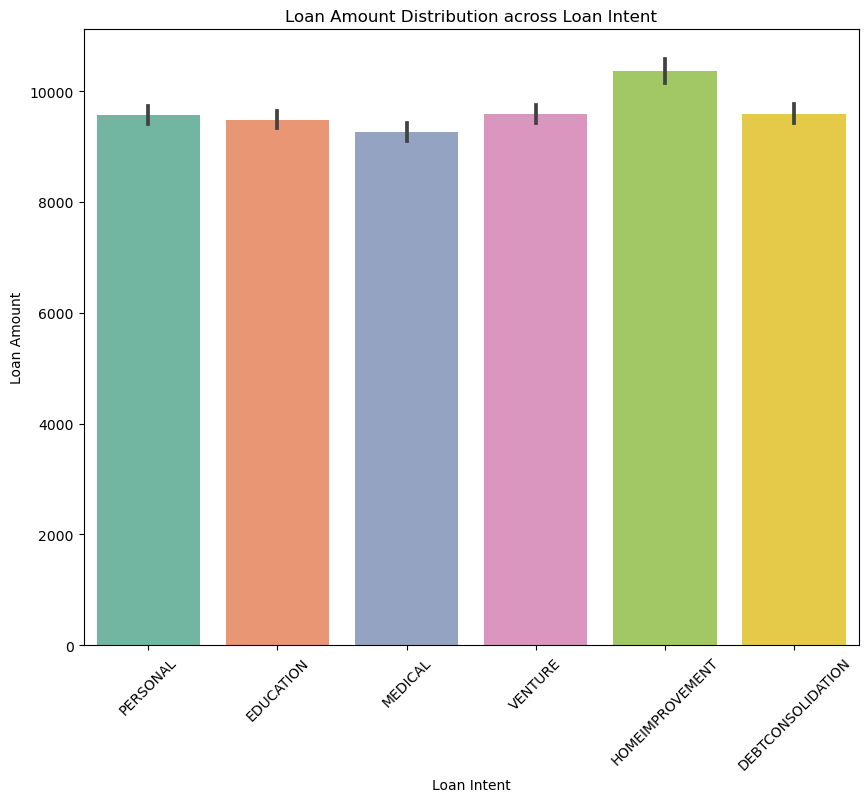

In [13]:
# Example boxplot for loan_amnt across loan_intent categories
plt.figure(figsize=(10, 8))
sns.barplot(x='loan_intent', y='loan_amnt', data=data, palette='Set2')
plt.title('Loan Amount Distribution across Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()